In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Exploratory Data Analysis

## Data Overview

In [2]:
df=pd.read_csv('Consumer_complaints.csv')

/home/ubuntu/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (5,6,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Date received,03/21/2016,03/21/2016,03/21/2016,03/21/2016,03/21/2016,03/21/2016,03/21/2016,03/21/2016,03/21/2016,03/21/2016,03/21/2016,03/21/2016,03/21/2016,03/20/2016,03/20/2016
Product,Debt collection,Consumer Loan,Debt collection,Consumer Loan,Bank account or service,Debt collection,Debt collection,Mortgage,Debt collection,Debt collection,Debt collection,Credit reporting,Debt collection,Debt collection,Debt collection
Sub-product,"Other (i.e. phone, health club, etc.)",Personal line of credit,"Other (i.e. phone, health club, etc.)",Vehicle loan,Checking account,"Other (i.e. phone, health club, etc.)","Other (i.e. phone, health club, etc.)",Conventional fixed mortgage,Auto,"Other (i.e. phone, health club, etc.)","Other (i.e. phone, health club, etc.)",NaN,Medical,Mortgage,Medical
Issue,Cont'd attempts collect debt not owed,Problems when you are unable to pay,Cont'd attempts collect debt not owed,Taking out the loan or lease,Problems caused by my funds being low,False statements or representation,Cont'd attempts collect debt not owed,"Loan servicing, payments, escrow account",Cont'd attempts collect debt not owed,False statements or representation,Cont'd attempts collect debt not owed,Unable to get credit report/credit score,Cont'd attempts collect debt not owed,Disclosure verification of debt,Disclosure verification of debt
Sub-issue,Debt was paid,NaN,Debt is not mine,NaN,NaN,Attempted to collect wrong amount,Debt is not mine,NaN,Debt is not mine,Attempted to collect wrong amount,Debt resulted from identity theft,Problem getting report or credit score,Debt is not mine,Right to dispute notice not received,Right to dispute notice not received
Consumer complaint narrative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Company public response,Company believes it acted appropriately as aut...,NaN,NaN,NaN,NaN,NaN,Company believes it acted appropriately as aut...,NaN,Company believes the complaint is the result o...,Company believes it acted appropriately as aut...,Company believes it acted appropriately as aut...,Company believes complaint caused principally ...,NaN,NaN,NaN
Company,"Eastern Account Systems of Connecticut, Inc.","OneMain Financial Holdings, LLC",Transworld Systems Inc.,Navy FCU,Navy FCU,"Hunter Warfield, Inc.","Amsher Collection Services, Inc.","Bayview Loan Servicing, LLC","CCS Financial Services, Inc.","Titan Receivables, Inc.","Professional Placement Services, LLC","Credit Karma, Inc.","Amsher Collection Services, Inc.",Ocwen,Asset Recovery Inc
State,CA,AL,CT,VA,IN,OH,OR,VA,CA,CA,MN,CA,AL,NC,NY
ZIP code,900XX,35094,06516,235XX,46143,43016,976XX,234XX,913XX,953XX,554XX,94134,35135,280XX,115XX


In [4]:
df.shape

(537992, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537992 entries, 0 to 537991
Data columns (total 18 columns):
Date received                   537992 non-null object
Product                         537992 non-null object
Sub-product                     386187 non-null object
Issue                           537979 non-null object
Sub-issue                       203546 non-null object
Consumer complaint narrative    59697 non-null object
Company public response         75922 non-null object
Company                         537992 non-null object
State                           530979 non-null object
ZIP code                        533186 non-null object
Tags                            75267 non-null object
Consumer consent provided?      110728 non-null object
Submitted via                   537989 non-null object
Date sent to company            537992 non-null object
Company response to consumer    537992 non-null object
Timely response?                537992 non-null object
Consumer dis

In [7]:
#df=df.sample(frac=0.1,replace=True)

In [8]:
df.shape

(537992, 18)

In [9]:
df['Company'].value_counts(dropna=False).shape

(3559,)

In [10]:
df['Product'].value_counts(dropna=False)

Mortgage                   182212
Debt collection             97237
Credit reporting            87166
Credit card                 64639
Bank account or service     60977
Consumer Loan               20100
Student loan                15392
Payday loan                  3751
Money transfers              3669
Prepaid card                 2345
Other financial service       504
Name: Product, dtype: int64

In [11]:
df['Sub-issue'].value_counts().shape

(68,)

In [12]:
df['Issue'].value_counts()

Loan modification,collection,foreclosure    95392
Incorrect information on credit report      63350
Loan servicing, payments, escrow account    58655
Cont'd attempts collect debt not owed       40685
Account opening, closing, or management     25940
Communication tactics                       17700
Disclosure verification of debt             17431
Deposits and withdrawals                    16770
Application, originator, mortgage broker    12969
Billing disputes                            10715
Other                                       10481
Credit reporting company's investigation     9943
Managing the loan or lease                   9501
Problems caused by my funds being low        8836
False statements or representation           7972
Unable to get credit report/credit score     7774
Improper contact or sharing of info          7139
Settlement process and costs                 6719
Problems when you are unable to pay          6658
Taking/threatening an illegal action         6310


In [13]:
df['Company public response'].value_counts(dropna=False)

NaN                                                                                                                        462070
Company chooses not to provide a public response                                                                            52483
Company believes it acted appropriately as authorized by contract or law                                                    13855
Company has responded to the consumer and the CFPB and chooses not to provide a public response                              3283
Company believes complaint caused principally by actions of third party outside the control or direction of the company      1412
Company disputes the facts presented in the complaint                                                                        1288
Company believes the complaint is the result of a misunderstanding                                                           1247
Company can't verify or dispute the facts in the complaint                                

In [14]:
df['Company response to consumer'].value_counts(dropna=False)

Closed with explanation            390227
Closed with non-monetary relief     67985
Closed with monetary relief         37186
Closed without relief               17909
Closed                              13069
Closed with relief                   5305
In progress                          3667
Untimely response                    2644
Name: Company response to consumer, dtype: int64

In [15]:
df['Tags'].value_counts(dropna=False)

NaN                              462725
Older American                    43743
Servicemember                     25396
Older American, Servicemember      6128
Name: Tags, dtype: int64

In [16]:
df['Date received'].max()

'12/31/2015'

In [17]:
df['Date received'].min()

'01/01/2012'

In [18]:
df['Submitted via'].value_counts(dropna=False)

Web            348870
Referral       106700
Phone           38683
Postal mail     35504
Fax              7888
Email             344
NaN                 3
Name: Submitted via, dtype: int64

In [19]:
df['Timely response?'].value_counts(dropna=False)

Yes    524461
No      13531
Name: Timely response?, dtype: int64

In [20]:
df['Consumer disputed?'].value_counts(dropna=False)

No     429175
Yes    108817
Name: Consumer disputed?, dtype: int64

In [21]:
company_complaitns_counts = df['Company'].value_counts()
df['company_complaint_counts'] = df['Company'].apply(lambda x: company_complaitns_counts[x])

In [22]:
company = pd.crosstab(df['Company'], df['Consumer disputed?'])

In [23]:
company.head()

Consumer disputed?,No,Yes
Company,,
"(Former)Shapiro, Swertfeger & Hasty, LLP",4,0
"1st 2nd Mortgage Company Of NJ, Inc.",1,0
1st Alliance Lending,11,2
"1st Capital Mortgage, LLC",0,1
1st Fidelity Loan Servicing,5,0


In [24]:
company['dispute_rate'] = company.Yes / (company.Yes + company.No)

In [25]:
company['company'] = company.index

In [26]:
company['complaint_counts'] = company['company'].apply(lambda x: company_complaitns_counts[x])

In [27]:
company = company.sort_values('complaint_counts', ascending=False)

In [28]:
company

Consumer disputed?,No,Yes,dispute_rate,company,complaint_counts
Company,,,,,
Bank of America,42792,12260,0.222699,Bank of America,55052
Wells Fargo & Company,31585,9472,0.230704,Wells Fargo & Company,41057
JPMorgan Chase & Co.,25556,7519,0.227332,JPMorgan Chase & Co.,33075
Equifax,23807,6308,0.209464,Equifax,30115
Experian,25683,3743,0.127200,Experian,29426
Citibank,19748,5131,0.206238,Citibank,24879
"TransUnion Intermediate Holdings, Inc.",20510,3659,0.151392,"TransUnion Intermediate Holdings, Inc.",24169
Ocwen,15605,5009,0.242990,Ocwen,20614
Capital One,12393,2876,0.188355,Capital One,15269


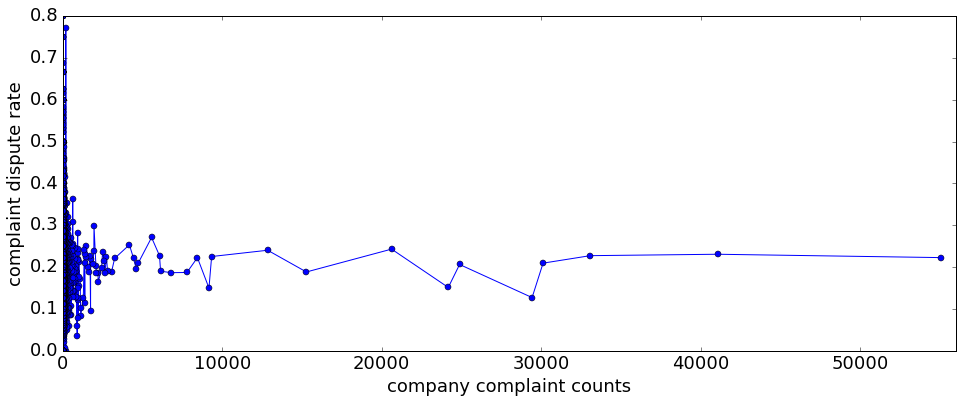

In [29]:
fig = plt.figure(figsize=(16,6))
plt.plot(company['complaint_counts'],company['dispute_rate'],marker='o')
plt.xlim([0.0, 56000])
plt.ylim([0.0, 0.8])
plt.xlabel('company complaint counts')
plt.ylabel('complaint dispute rate')
plt.title('')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.rcParams.update({'font.size': 18})

plt.show()
fig.savefig('disputerate_complaintcount.png')

In [30]:
temp= pd.crosstab(df['Product'], df['Consumer disputed?'])

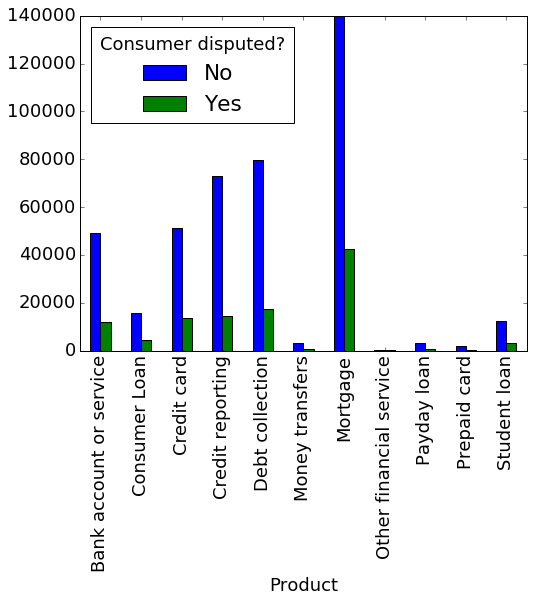

In [31]:
temp.plot(kind='bar',figsize=(8,6))## The disputed percentages are about same between 
###Consent and Consent Not "complaint narrative text".

In [32]:
temp1= pd.crosstab(df['Company response to consumer'], df['Consumer disputed?'])

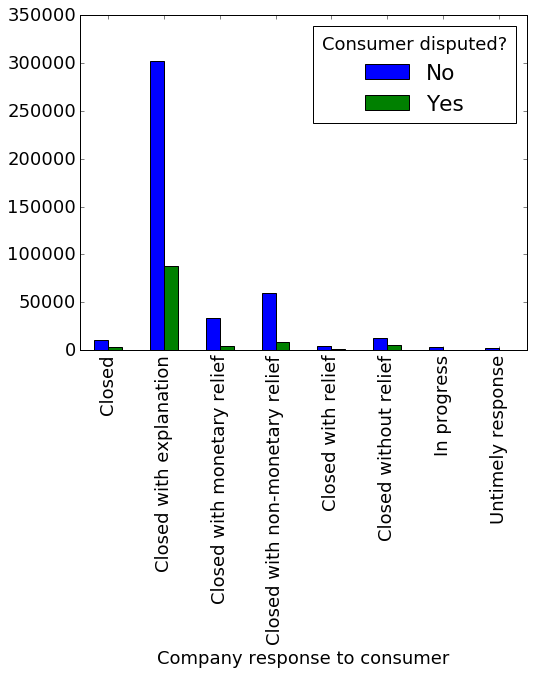

In [33]:
temp1.plot(kind='bar',figsize=(8,6)) ###Most cases are fall in closed with explaination

In [34]:
temp3= pd.crosstab(df['Product'], df['Consumer disputed?'])

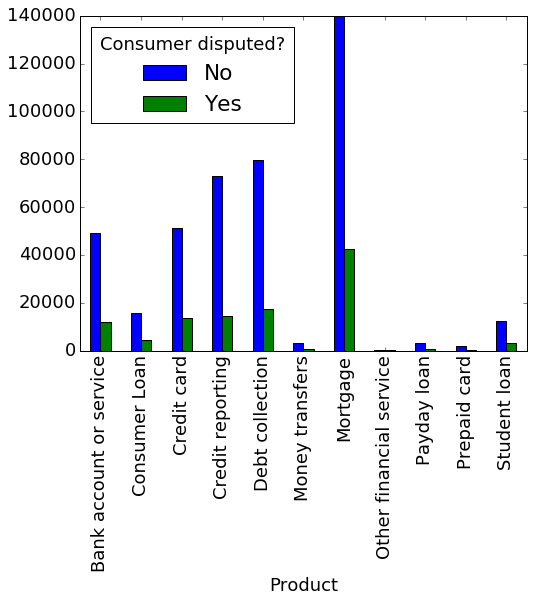

In [35]:
temp3.plot(kind='bar',figsize=(8,6))

In [36]:
##plt.hist(np.log(df['Company'].value_counts()))
##plt.xlabel(df['Company'].value_counts().index)

In [37]:
df['State'].value_counts().shape

(62,)

In [38]:
df['Date received']=pd.DatetimeIndex(df['Date received'],format='%m/%d/%Y').date
df['Date sent to company']=pd.DatetimeIndex(df['Date sent to company'],format='%m/%d/%Y').date

In [39]:
df[df['Date received']!=df['Date sent to company']].shape

(314405, 19)

## Missing Value Handling

In [40]:
df[pd.isnull(df['Issue'])]

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,company_complaint_counts
22604,2016-01-24,Bank account or service,Checking account,NaN,NaN,NaN,NaN,JPMorgan Chase & Co.,WI,530XX,NaN,NaN,Web,2016-01-24,Closed with explanation,Yes,Yes,1755250,33075
31788,2016-01-05,Bank account or service,Checking account,NaN,NaN,NaN,Company chooses not to provide a public response,Citibank,CA,912XX,Older American,NaN,Web,2016-01-05,Closed with explanation,Yes,Yes,1726979,24879
66703,2015-10-15,Bank account or service,Checking account,NaN,NaN,NaN,Company believes it acted appropriately as aut...,TCF National Bank,MN,553XX,NaN,NaN,Web,2015-10-15,Closed with monetary relief,Yes,No,1608941,1038
69600,2015-10-09,Money transfers,Domestic (US) money transfer,NaN,NaN,NaN,NaN,"PayPal Holdings, Inc.",CA,900XX,NaN,NaN,Web,2015-10-09,Closed with explanation,Yes,No,1600411,2069
80795,2015-09-16,Consumer Loan,Vehicle loan,NaN,NaN,NaN,NaN,Santander Consumer USA Holdings Inc,OR,978XX,NaN,NaN,Web,2015-09-16,Closed with explanation,Yes,Yes,1566496,1947
82698,2015-09-11,Consumer Loan,Vehicle loan,NaN,NaN,NaN,Company chooses not to provide a public response,Ally Financial Inc.,TX,762XX,NaN,NaN,Web,2015-09-11,Closed with explanation,Yes,No,1560539,2215
109106,2015-07-21,Bank account or service,Checking account,NaN,NaN,NaN,Company chooses not to provide a public response,"SunTrust Banks, Inc.",VA,22030,NaN,Consent not provided,Web,2015-07-21,Closed with monetary relief,Yes,No,1479745,4737
184850,2015-02-10,Bank account or service,Other bank product/service,NaN,NaN,NaN,NaN,Wells Fargo & Company,FL,33428,NaN,NaN,Web,2015-02-10,Closed with explanation,Yes,No,1235087,41057
186858,2015-02-05,Bank account or service,Checking account,NaN,NaN,NaN,NaN,JPMorgan Chase & Co.,FL,33487,Servicemember,NaN,Web,2015-02-05,Closed with monetary relief,Yes,No,1226302,33075
225866,2014-10-29,Consumer Loan,Vehicle loan,NaN,NaN,NaN,NaN,USAA Savings,VA,23703,Servicemember,NaN,Web,2014-10-29,Closed with monetary relief,Yes,No,1092632,2102


In [41]:
df['Sub-product'].fillna('Not Provided',inplace=True)
df['Sub-issue'].fillna('Not Provided',inplace=True)
df['Consumer complaint narrative'].fillna('None or Not Provided',inplace=True)
###Combine "company public missing value" with "Company chose not to provide"
df['Company public response'].fillna('Company chooses not to provide',inplace=True) 

###Combine missing value of "Issue" with "Other"
df['Issue'].fillna('Other',inplace=True) 

### Replace missing vlaues of 'Tags' with "'Unknown'
df['Tags'].fillna('Unknown',inplace=True) 

### Replace missing vlaues of 'Submitted via' with "'other'
df['Submitted via'].fillna('Other',inplace=True) 

###Combine missing value,other,and withdrawn of "Consumer consent provided? " 
###with Consumer consent not provided, since only users's complaints narrative will be provided
### with the type of Consumer consent provided
df['Consumer consent provided?'].fillna('Consent not provided',inplace=True) 
df['Consumer consent provided?']=df['Consumer consent provided?'].apply(lambda x: 
            'Consent not provided' if x=='Other' or x=='Consent withdrawn' else x)

In [42]:
### Fill missing 'State' info using valide zipcode.
from pyzipcode import ZipCodeDatabase
zip=ZipCodeDatabase()
for i in df[pd.isnull(df['State'])&pd.notnull(df['ZIP code'])].index:
    try:
        df['State'][i]=str(zip[df['ZIP code'][i]].state)
    except:
        continue

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [43]:
df[pd.isnull(df['State'])&pd.isnull(df['ZIP code'])].shape ###Still 4268 users has no state info

(4268, 19)

In [44]:
df['State'].fillna('Not provided',inplace=True)
df['ZIP code'].fillna('Not Provided',inplace=True)

In [45]:
df['Consumer consent provided?'].value_counts(dropna=False)

Consent not provided    478295
Consent provided         59697
Name: Consumer consent provided?, dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537992 entries, 0 to 537991
Data columns (total 19 columns):
Date received                   537992 non-null object
Product                         537992 non-null object
Sub-product                     537992 non-null object
Issue                           537992 non-null object
Sub-issue                       537992 non-null object
Consumer complaint narrative    537992 non-null object
Company public response         537992 non-null object
Company                         537992 non-null object
State                           537992 non-null object
ZIP code                        537992 non-null object
Tags                            537992 non-null object
Consumer consent provided?      537992 non-null object
Submitted via                   537992 non-null object
Date sent to company            537992 non-null object
Company response to consumer    537992 non-null object
Timely response?                537992 non-null object
Consumer 

In [47]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,company_complaint_counts
0,2016-03-21,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt was paid,None or Not Provided,Company believes it acted appropriately as aut...,"Eastern Account Systems of Connecticut, Inc.",CA,900XX,Unknown,Consent not provided,Web,2016-03-21,Closed with explanation,Yes,No,1841695,101
1,2016-03-21,Consumer Loan,Personal line of credit,Problems when you are unable to pay,Not Provided,None or Not Provided,Company chooses not to provide,"OneMain Financial Holdings, LLC",AL,35094,Unknown,Consent not provided,Phone,2016-03-21,In progress,Yes,No,1842862,719
2,2016-03-21,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,None or Not Provided,Company chooses not to provide,Transworld Systems Inc.,CT,06516,Unknown,Consent not provided,Web,2016-03-21,In progress,Yes,No,1841754,1371
3,2016-03-21,Consumer Loan,Vehicle loan,Taking out the loan or lease,Not Provided,None or Not Provided,Company chooses not to provide,Navy FCU,VA,235XX,Servicemember,Consent not provided,Web,2016-03-21,In progress,Yes,No,1841976,1552
4,2016-03-21,Bank account or service,Checking account,Problems caused by my funds being low,Not Provided,None or Not Provided,Company chooses not to provide,Navy FCU,IN,46143,Unknown,Consent not provided,Referral,2016-03-21,In progress,Yes,No,1842011,1552


In [48]:
print df.groupby(df['Consumer disputed?'])['Date received']

In [49]:
#df=df[df['Consumer complaint narrative']!= 'None or Not Provided']

In [50]:
temp5 = pd.crosstab(df['Consumer consent provided?'], df['Consumer disputed?'])

In [51]:
temp5

Consumer disputed?,No,Yes
Consumer consent provided?,,
Consent not provided,383425,94870
Consent provided,45750,13947


In [52]:
df['Consumer consent provided?'].value_counts()

Consent not provided    478295
Consent provided         59697
Name: Consumer consent provided?, dtype: int64

# Feature Engineering

## Creating label

In [53]:
replace={'Yes':True, 'No':False}

In [54]:
df['Consumer disputed?']= df['Consumer disputed?'].apply(lambda x: replace[x])

## Feature creating

In [55]:
#Creat a dataframe including all the features in the model
df_model = DataFrame()

In [56]:
#Create 'consent provided' Boolean feature
replace1={'Consent provided':True, 'Consent not provided':False}
df_model['Consumer consent provided?']= df['Consumer consent provided?'].apply(lambda x: replace1[x])

In [57]:
#Create the number of compliants of each company as a feature
company_complaitns_counts = df['Company'].value_counts()
df_model['company_complaint_counts'] = df['Company'].apply(lambda x: company_complaitns_counts[x])

In [58]:
feature_for_model=['Product', 'Sub-product','Issue','Sub-issue', 'Company public response','Tags',
                'Company response to consumer', 'State']
for name in feature_for_model:
    repl={}
    i=0
    for value in df[name].unique():
        repl[value] = i
        i+=1
       
    df[name] = df[name].apply(lambda x: repl[x])
    df_model[name] = df[name].astype('category')
           

In [59]:
##process time refers to days between the date CFPB received complaitns and the date 
##when complaints were sent to company on behal of comsume
df['Process time']=(df['Date sent to company']-df['Date received']).astype('timedelta64[D]').astype(int)
df_model=pd.concat([df_model,df['Process time']],axis=1)

In [60]:
#Create 'Timely response" boolean feature
df['Timely response?'] = df['Timely response?'].apply(lambda x: replace[x])
df_model=pd.concat([df_model,df['Timely response?']],axis=1)

In [61]:
##Create features about complaint submitted time
df_model['Date_received_year'] = df['Date received'].apply(lambda x: x.year)
df_model['Date_received_month'] = df['Date received'].apply(lambda x: x.month)
df_model['Date_received_day'] = df['Date received'].apply(lambda x: x.day)

In [62]:
df_model.head().T

,0,1,2,3,4
Consumer consent provided?,False,False,False,False,False
company_complaint_counts,101,719,1371,1552,1552
Product,0,1,0,1,2
Sub-product,0,1,0,2,3
Issue,0,1,0,2,3
Sub-issue,0,1,2,1,1
Company public response,0,1,1,1,1
Tags,0,0,0,1,0
Company response to consumer,0,1,1,1,1
State,0,1,2,3,4


# Modeling

In [63]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
import sklearn.metrics as skm
from sklearn.pipeline import Pipeline
from scipy import interp
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

## Modeling with non-complaint narrative text features

In [64]:
X = df_model.values
y = df['Consumer disputed?'].values

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=67)

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  

/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### First Logistic Regression Model

In [67]:
lr = LogisticRegression(class_weight='auto')
lr.fit(X_train, y_train)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)


LogisticRegression(C=1.0, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
lr.score(X_test,y_test)

0.53863883493341014

In [69]:
v_probs = lr.predict_proba(X_test)[:, 1]

In [70]:
def roc_curve(probabilities, labels):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: list, list, list

    Take a numpy array of the predicted probabilities and a numpy array of the
    true labels.
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve.
    '''

    thresholds = np.sort(probabilities)

    tprs = []
    fprs = []

    num_positive_cases = sum(labels)
    num_negative_cases = len(labels) - num_positive_cases

    for threshold in thresholds:
        # With this threshold, give the prediction of each instance
        predicted_positive = probabilities >= threshold
        # Calculate the number of correctly predicted positive cases
        true_positives = np.sum(predicted_positive * labels)
        # Calculate the number of incorrectly predicted positive cases
        false_positives = np.sum(predicted_positive) - true_positives
        # Calculate the True Positive Rate
        tpr = true_positives / float(num_positive_cases)
        # Calculate the False Positive Rate
        fpr = false_positives / float(num_negative_cases)

        fprs.append(fpr)
        tprs.append(tpr)
    
    return tprs, fprs, thresholds.tolist()

def plot_roc(v_probs, y_test, title, xlabel, ylabel):
    # ROC
    fig = plt.figure(figsize = (8,6))
    tpr, fpr, thresholds = roc_curve(v_probs, y_test)
    
    import sklearn.metrics as skm
    auc = skm.roc_auc_score(y_test, v_probs)

    plt.hold(True)
    plt.plot(fpr, tpr)

    # 45 degree line
    xx = np.linspace(0, 1.0, 20)
    plt.plot(xx, xx, 'k--')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.show()
    fig.savefig(title+'.png')

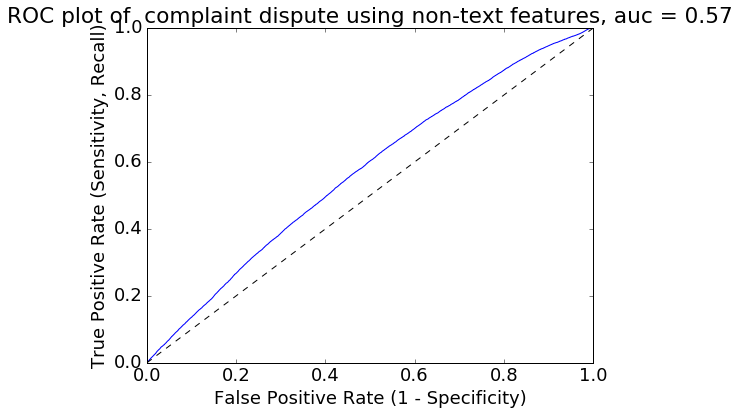

In [71]:
plot_roc(v_probs, y_test, "ROC plot of  complaint dispute using non-text features, auc = 0.57", 
         "False Positive Rate (1 - Specificity)", "True Positive Rate (Sensitivity, Recall)")

In [72]:
import sklearn.metrics as skm
skm.roc_auc_score(y_test, v_probs)

0.57078450366682487

In [73]:
v_probs.shape

(107599,)

In [74]:
skm.recall_score(y_test, lr.predict(X_test))

0.57189104194607598

In [75]:
pd.crosstab(y_test, lr.predict(X_test))

col_0,False,True
row_0,,
False,45591,40385
True,9257,12366


In [76]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_true):
    cm = confusion_matrix(y_true, model.predict(X_test))

    print(cm)

    # Show confusion matrix in a separate window
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

[[45591 40385]
 [ 9257 12366]]


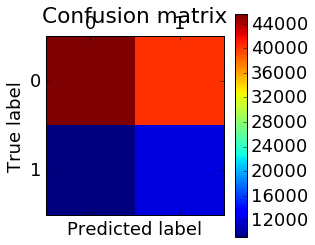

In [77]:
plot_confusion_matrix(lr, X_test, y_test)

### Now try descision tree model

In [78]:
## Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=2000, n_jobs=-1, class_weight='auto', max_features=1)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [79]:
rfc.score(X_test, y_test)

0.79438470617756674

In [80]:
pd.crosstab(y_test, rfc.predict(X_test))

col_0,False,True
row_0,,
False,84591,1385
True,20739,884


In [81]:
skm.roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1])

0.61690180079745383

In [82]:
skm.recall_score(y_test, rfc.predict(X_test))

0.040882393747398604

[[84591  1385]
 [20739   884]]


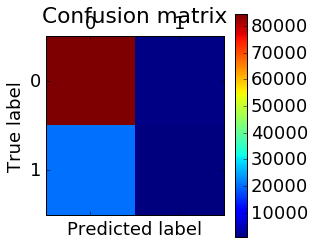

In [83]:
plot_confusion_matrix(rfc, X_test, y_test)

In [84]:
def plot_importance(clf, X, max_features=10):
    '''Plot feature importance'''
    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    
    # Show only top features
    pos = pos[-max_features:]
    feature_importance = (feature_importance[sorted_idx])[-max_features:]
    feature_names = (X.columns[sorted_idx])[-max_features:]
    
    plt.barh(pos, feature_importance, align='center')
    plt.yticks(pos, feature_names)
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')

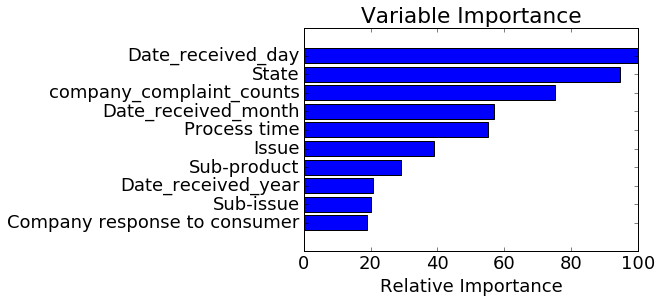

In [85]:
plot_importance(rfc, df_model, max_features=10)

In [86]:
#Create features about 'Consumenr complaint narrative'

from string import punctuation, ascii_letters

def process_text_field(text):
    '''
    text: string
    OUTPUT: int, int, int, float (length, word count, uppercase_count_rate, punctuation_rate)
    '''
    length = len(text)
    word_count = 0
    last_char = False
    for c in text:
        if c in ascii_letters:
            if last_char==False:
                word_count += 1
                last_char=True
        else:
            last_char = False
    
    punct_count = 0
    uppercase_count = 0
    for c in text:
        if c in punctuation:
            punct_count += 1
        if c.isupper():
            uppercase_count += 1
    punctuation_rate = punct_count / float(length+1)
    uppercase_count_rate = uppercase_count / float(length+1)
    
    return length, word_count, uppercase_count_rate, punctuation_rate

def process_text_column(df, fieldname):
    length_list = []
    word_count_list = []
    punctuation_rate_list = []
    uppercase_count_rate_list=[]
    for row_ix in df.index:
        length, word_count, uppercase_count_rate, punctuation_rate = process_text_field(df[fieldname][row_ix])
        length_list.append(length)
        word_count_list.append(word_count)
        uppercase_count_rate_list.append(uppercase_count_rate)
        punctuation_rate_list.append(punctuation_rate)
    return length_list, word_count_list, uppercase_count_rate_list, punctuation_rate_list

In [87]:
stemmer = SnowballStemmer("english")

def stem_tokens(tokens, stemmer):
    stemmed=[]
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

### Model with features extracted from "Consumer complaint narrative"

In [88]:
df=df[df['Consumer complaint narrative']!= 'None or Not Provided']

In [89]:
chars_to_remove = ['XX', 'XXX', 'XXXX']
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(lambda x: x.translate(None, ''.join(chars_to_remove)))

In [90]:
X_word = df['Consumer complaint narrative'].values
y = df['Consumer disputed?'].values

In [91]:
X_word.shape

(59697,)

In [92]:
X_train_word, X_test_word, y_train, y_test = train_test_split(X_word, y, test_size=0.20, random_state=67)
vectorizer = TfidfVectorizer(stop_words='english',lowercase=False, min_df=0.001, max_df = 0.2,
                             )
words_matrix_train = vectorizer.fit_transform(X_train_word)
words_matrix_test = vectorizer.transform(X_test_word)
words_matrix = vectorizer.transform(X_word)

In [93]:
words_matrix.shape

(59697, 5136)

In [94]:
#MultinomialNB classifier directly using tfidf text

model = MultinomialNB()
model.fit(words_matrix_train, y_train)

##Model evaluation via 'Consumer complaint narrative' only

model.score(words_matrix_test,y_test)
skm.roc_auc_score(y_test, model.predict_proba(words_matrix_test)[:, 1])

0.62575286653651596

In [95]:
# random forest directly using tfidf
rfc = RandomForestClassifier(n_estimators=500, n_jobs=-1, class_weight='auto' )
rfc.fit(words_matrix_train, y_train)
skm.roc_auc_score(y_test, rfc.predict_proba(words_matrix_test)[:, 1])

0.66520146880469211

In [96]:
#plot_importance(rfc, words_matrix, max_features=10)

In [97]:
y_test.shape

(11940,)

In [98]:
v_prob = rfc.predict_proba(words_matrix_test)[:, 1]

In [99]:
v_prob.shape

(11940,)

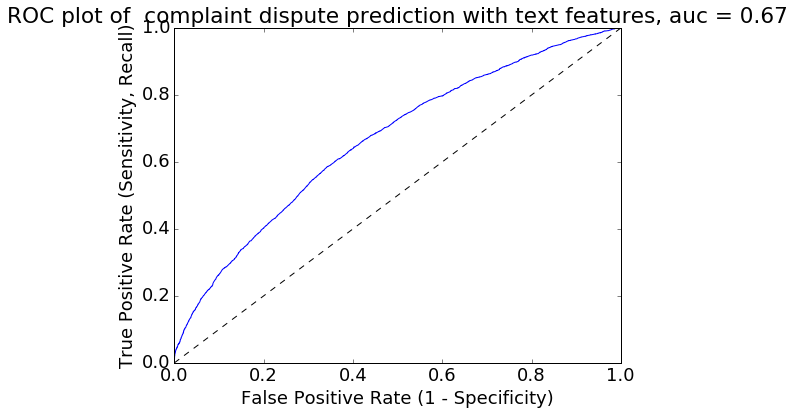

In [100]:
plot_roc(v_prob, y_test, "ROC plot of  complaint dispute prediction with text features, auc = 0.67", 
         "False Positive Rate (1 - Specificity)", "True Positive Rate (Sensitivity, Recall)")

In [101]:
features = np.array(vectorizer.get_feature_names())

In [102]:
type(features)

numpy.ndarray

In [103]:
table = DataFrame(words_matrix.toarray(), columns = features)

In [104]:
table.head()

,000,10,100,1000,10000,100000,11,110,1100,11000,...,yelled,yelling,yes,yesterday,young,yr,yrs,zero,zip,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.39087,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.00000,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.00000,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.00000,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.00000,0,0,0


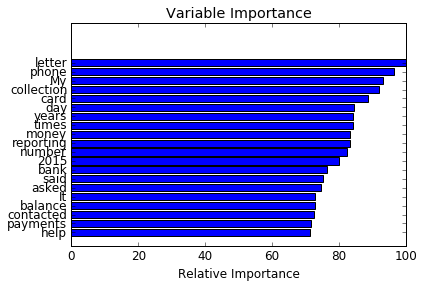

In [127]:
plot_importance(rfc, table, max_features=20)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.rcParams.update({'font.size': 12})

In [106]:
from sklearn.linear_model import SGDClassifier

In [107]:
sgd = SGDClassifier(loss= 'log')

In [108]:
sgd.fit(words_matrix_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [109]:
skm.roc_auc_score(y_test, sgd.predict_proba(words_matrix_test)[:, 1])

0.64544095207402785

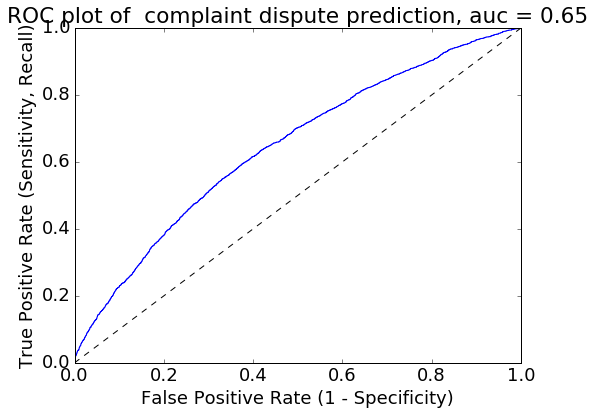

In [110]:
plot_roc(sgd.predict_proba(words_matrix_test)[:, 1], y_test, "ROC plot of  complaint dispute prediction, auc = 0.65", 
         "False Positive Rate (1 - Specificity)", "True Positive Rate (Sensitivity, Recall)")

In [111]:
#prediction according to threshold value.
def model_predict(probs, threshold):
    pred = []
    for prob in probs:
        if prob>=threshold:
            pred.append(1)
        else: pred.append(0)
    return np.array(pred)

In [112]:
probs = sgd.predict_proba(words_matrix_test)[:, 1]

In [113]:
probs.shape

(11940,)

In [114]:
predict = np.array(model_predict(probs, 0.2))

In [115]:
len(predict)

11940

In [116]:
pd.crosstab(y_test,predict)

col_0,0,1
row_0,,
False,3800,5271
True,690,2179


In [123]:
def plot_curve(probabilities, labels, title):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: list, list, list

    Take a numpy array of the predicted probabilities and a numpy array of the
    true labels.
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve.
    '''

    thresholds = np.sort(probabilities)

    tprs = []
    fprs = []
    fnrs = []
    accus = []

    num_positive_cases = sum(labels)
    num_negative_cases = len(labels) - num_positive_cases
   

    for threshold in thresholds:
        # With this threshold, give the prediction of each instance
        predicted_positive = probabilities >= threshold
        predicted = np.array([1 if i >= threshold else 0 for i in probabilities])
        # Calculate the number of correctly predicted positive cases
        true_positives = np.sum(predicted_positive * labels)
        # Calculate the number of incorrectly predicted positive cases
        false_positives = np.sum(predicted_positive) - true_positives
        # Calculate the True Positive Rate
        tpr = true_positives / float(num_positive_cases)
        # Calculate the False Positive Rate
        fpr = false_positives / float(num_negative_cases)
        # Calculate the False Negative Rate
        fnr = 1 - tpr
        # Calculate the overall accuracy
        accu = float(np.sum(predicted==labels))/len(labels)

        fprs.append(fpr)
        tprs.append(tpr)
        fnrs.append(fnr)
        accus.append(accu)
        
    fig = plt.figure(figsize=(8,6))   
    plt.xlim([np.min(probabilities), np.max(probabilities)])
    plt.ylim([0.0, 1.05])
    plt.plot(thresholds.tolist(),fprs,  label = 'false positive rate')
    plt.plot(thresholds.tolist(),fnrs, label = 'false negative rate')
    plt.plot(thresholds.tolist(),accus, label = 'overall accuracy')
    plt.plot(np.repeat([0.228],100), np.linspace(0,1.05,100), 'k--', label = 'selected threshold')
    plt.legend(loc="lower right")
    plt.title(title)
    plt.show()
    fig.savefig('threshold_select.png')


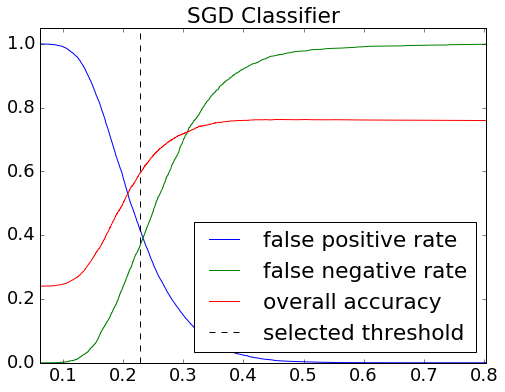

In [124]:
plot_curve(probs, y_test, 'SGD Classifier')